In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.style.use('dark_background') 
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
from collections import Counter

In [2]:
data = pd.read_csv('arxiv_papers.csv')

In [3]:
data

,title,abstract,authors,figures,pages,tables,pdf_link,primary_subject,secondary_subjects,submitted_journal,published_journal,keywords,date
0,Insights on Galaxy Evolution from Interpretabl...,Galaxy appearances reveal the physics of how t...,['John F. Wu'],4.0,10.0,2.0,arxiv.org/pdf/2501.00089,Astrophysics of Galaxies,['Machine Learning'],AAS Journals,NaN,"['Galaxies (573)', 'Astronomy image processing...",2025-01-03
1,Hunting for the candidates of Changing-Look Bl...,The changing-look blazars (CLBs) are the blaza...,"['Shi-Ju Kang', 'Shan-Shan Ren', 'Yong-Gang Zh...",7.0,13.0,3.0,arxiv.org/pdf/2501.00094,High Energy Astrophysical Phenomena,NaN,ApJ,NaN,['Active galactic nuclei (16) – Blazars (164) ...,2025-01-03
2,First unambiguous detection of ammonia in the ...,The newly accessible mid-infrared (MIR) window...,"['Mathilde Mâlin', 'Anthony Boccaletti', 'Clém...",6.0,18.0,4.0,arxiv.org/pdf/2501.00104,Earth and Planetary Astrophysics,NaN,A&A,NaN,"['Planetary systems', 'Stars: individual: GJ 5...",2025-01-03
3,Exchange of meteorites between the terrestrial...,The evolution of the orbits of bodies ejected ...,['S.I. Ipatov'],0.0,6.0,0.0,arxiv.org/pdf/2501.00134,Earth and Planetary Astrophysics,NaN,NaN,Modern astronomy: from the Early Universe to e...,['planets and satellites: terrestrial planets'],2025-01-03
4,Autoencoder Reconstruction of Cosmological Mic...,Enhanced modeling of microlensing variations i...,"['Somayeh Khakpash', 'Federica Bianco', 'Georg...",11.0,18.0,1.0,arxiv.org/pdf/2501.00153,Instrumentation and Methods for Astrophysics,NaN,The Astrophysical Journal,NaN,['- Interdisciplinary astronomy(804) 1'],2025-01-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16418,Quasar clustering and duty cycle measurements ...,We measure the two-point correlation function ...,"['Mariona Giner Mascarell', 'Anna-Christina Ei...",5.0,11.0,3.0,arxiv.org/pdf/2511.17413,Astrophysics of Galaxies,['Cosmology and Nongalactic Astrophysics'],NaN,NaN,[],2025-11-24
16419,Moving superfluids in the rotating universe,We study homogeneous cosmological models featu...,"['Jose Beltrán Jiménez', 'Federico Piazza', 'J...",3.0,20.0,0.0,arxiv.org/pdf/2511.17472,Cosmology and Nongalactic Astrophysics,['General Relativity and Quantum Cosmology'],NaN,NaN,[],2025-11-24
16420,Performance Simulations for Kola: Achieving Hi...,We present performance simulations for a propo...,"['Brianna Peck', 'Jessica R. Lu', 'Lianqi Wang...",9.0,18.0,7.0,arxiv.org/pdf/2511.17488,Instrumentation and Methods for Astrophysics,NaN,NaN,NaN,['Adaptive optics (2281) — Laser guide stars (...,2025-11-24
16421,Effect of local environment on Ly$α$ line prof...,Lyman-Alpha Emitters (LAEs) are star-forming g...,"['Ana Sofía M. Uzsoy', 'Arjun Dey', 'Anand Rai...",6.0,17.0,1.0,arxiv.org/pdf/2511.17498,Astrophysics of Galaxies,NaN,NaN,NaN,[],2025-11-24


In [4]:
authors = data['authors'].tolist()
# Flatten the list of authors and count occurrences
all_authors = [author for sublist in authors for author in sublist.split(', ')]
author_counts = Counter(all_authors)

# Find the most common author
most_common_author, count = author_counts.most_common(1)[0]
print(f"The most repeated author is {most_common_author} and they were repeated {count} times.")

# Find the second most common author
second_most_common_author, count = author_counts.most_common(2)[1]
print(f"The second most repeated author is {second_most_common_author} and they were repeated {count} times.")

The most repeated author is 'J. Carretero' and they were repeated 125 times.
The second most repeated author is 'S. Bardelli' and they were repeated 102 times.


In [5]:
primary_subjects = data['primary_subject'].tolist()
# Flatten the list of primary subjects and count occurrences
all_primary_subjects = [subject for sublist in primary_subjects for subject in sublist.split(', ')]
primary_subject_counts = Counter(all_primary_subjects)

# Find the most common primary subject
most_common_primary_subject, count = primary_subject_counts.most_common(1)[0]
print(f"The most repeated primary subject is {most_common_primary_subject} and it was repeated {count} times.")

# Find the 2nd most common primary subject
most_common_primary_subject_2, count = primary_subject_counts.most_common(2)[1]
print(f"The second most repeated primary subject is {most_common_primary_subject_2} and it was repeated {count} times.")

The most repeated primary subject is Astrophysics of Galaxies and it was repeated 4282 times.
The second most repeated primary subject is High Energy Astrophysical Phenomena and it was repeated 3451 times.


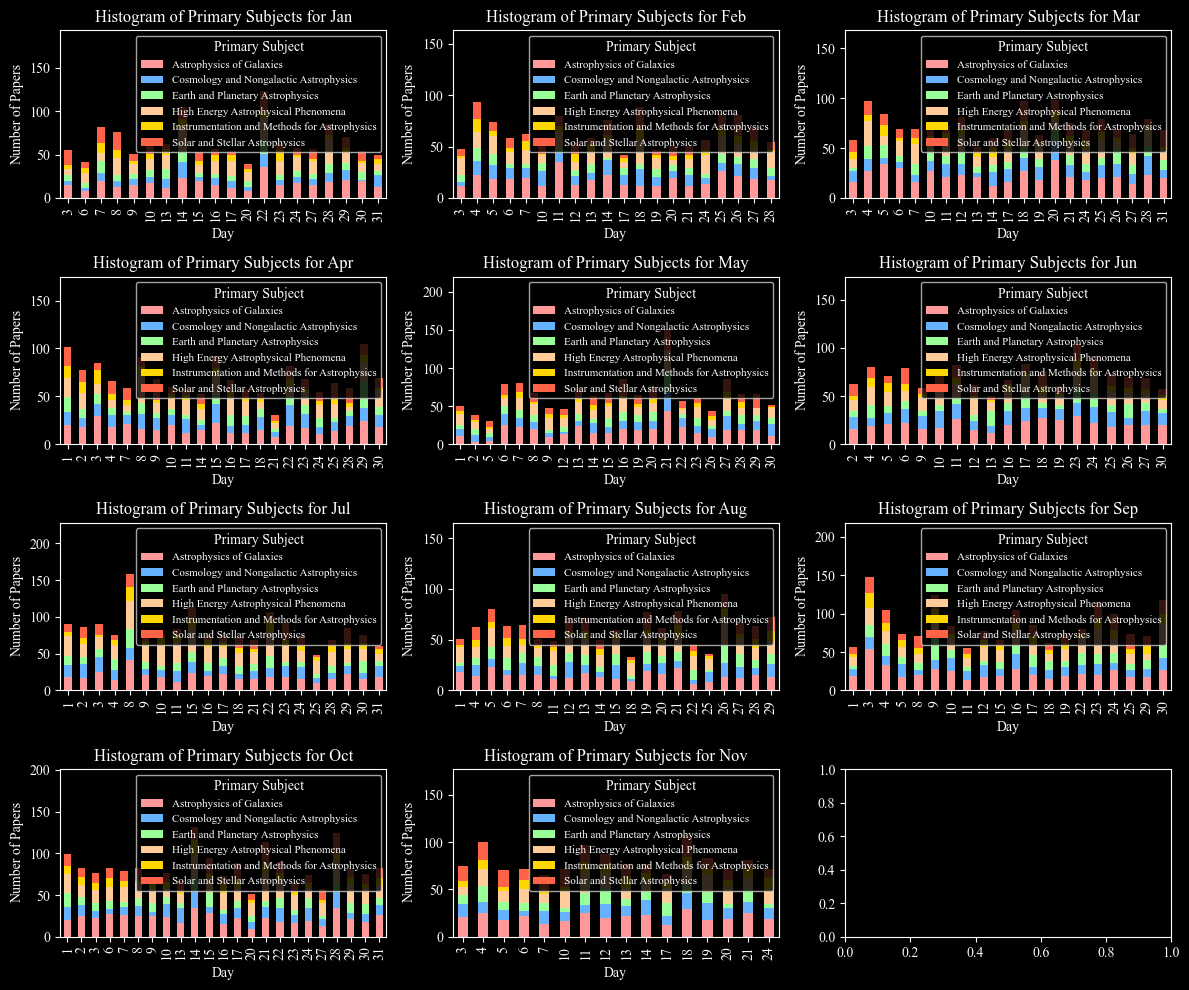

In [6]:
data['date'] = pd.to_datetime(data['date'])
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.strftime('%b')

colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFD700', '#FF6347']

num_unique_months = data['month'].nunique()
list_unique_months = data['month'].unique()

fig, axs = plt.subplots(4, 3, figsize=(12, 10))

for i in range(num_unique_months):
    ax = axs[i // 3, i % 3]
    masked_data = data[data['month'] == list_unique_months[i]]
    subject_counts_per_day = masked_data.groupby(['day', 'primary_subject']).size().unstack(fill_value=0)
    subject_counts_per_day.plot(kind='bar', stacked=True, ax=ax, color=colors)
    ax.set_xlabel('Day')
    ax.set_ylabel('Number of Papers')
    ax.set_ylim(0, max(subject_counts_per_day.sum(axis=1)) + 70)
    ax.set_title(f'Histogram of Primary Subjects for {list_unique_months[i]}')
    ax.legend(title='Primary Subject', fontsize = 8, loc = 'upper right')

plt.tight_layout()
plt.show()


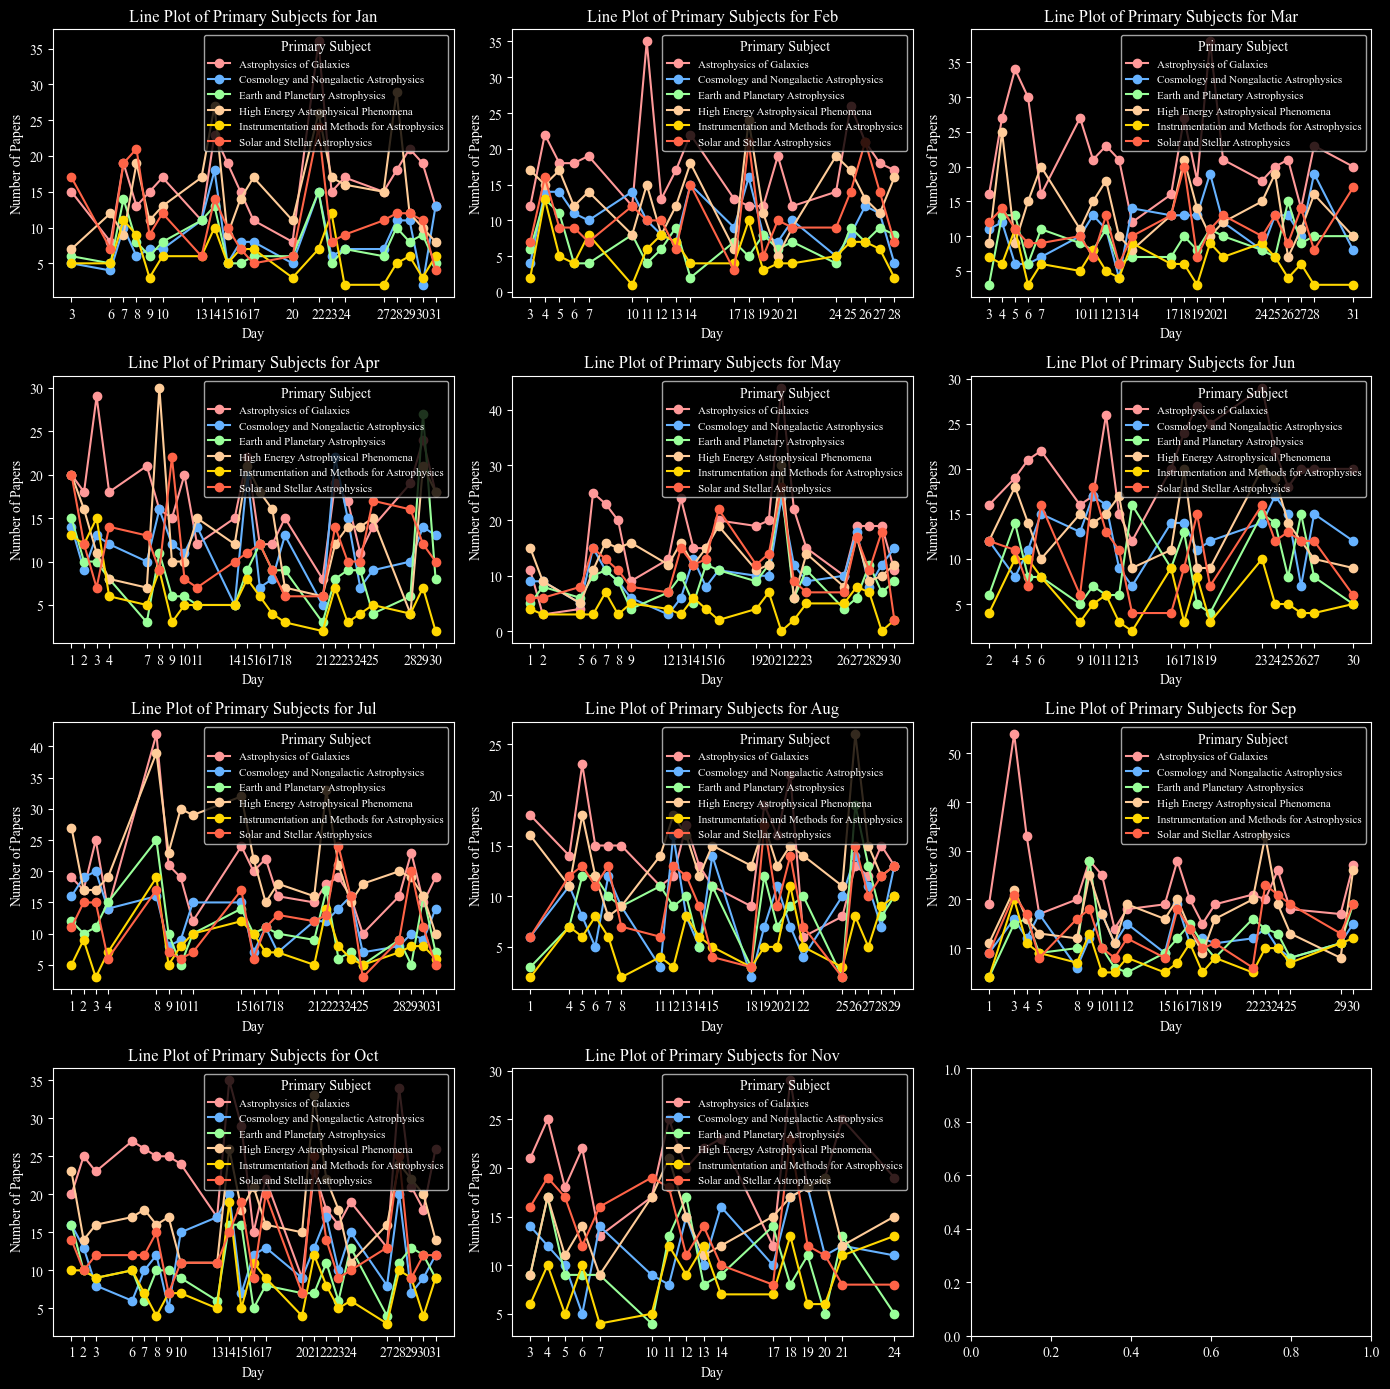

In [7]:
fig, axs = plt.subplots(4, 3, figsize=(14, 14))

for i, month in enumerate(list_unique_months):
    ax = axs[i // 3, i % 3]
    masked_data = data[data['month'] == month]
    subject_counts_per_day = masked_data.groupby(['day', 'primary_subject']).size().unstack(fill_value=0)
    for j, subject in enumerate(subject_counts_per_day.columns):
        ax.plot(subject_counts_per_day.index, subject_counts_per_day[subject], color=colors[j], label=subject, marker='o')
    ax.set_xlabel('Day')
    ax.set_ylabel('Number of Papers')
    ax.set_title(f'Line Plot of Primary Subjects for {month}')
    xticks_labels = [f"{day}" for day in subject_counts_per_day.index]
    ax.set_xticks(subject_counts_per_day.index)
    ax.set_xticklabels(xticks_labels, rotation=0)
    ax.legend(title='Primary Subject', fontsize=8, loc='upper right')

plt.tight_layout()
plt.show()

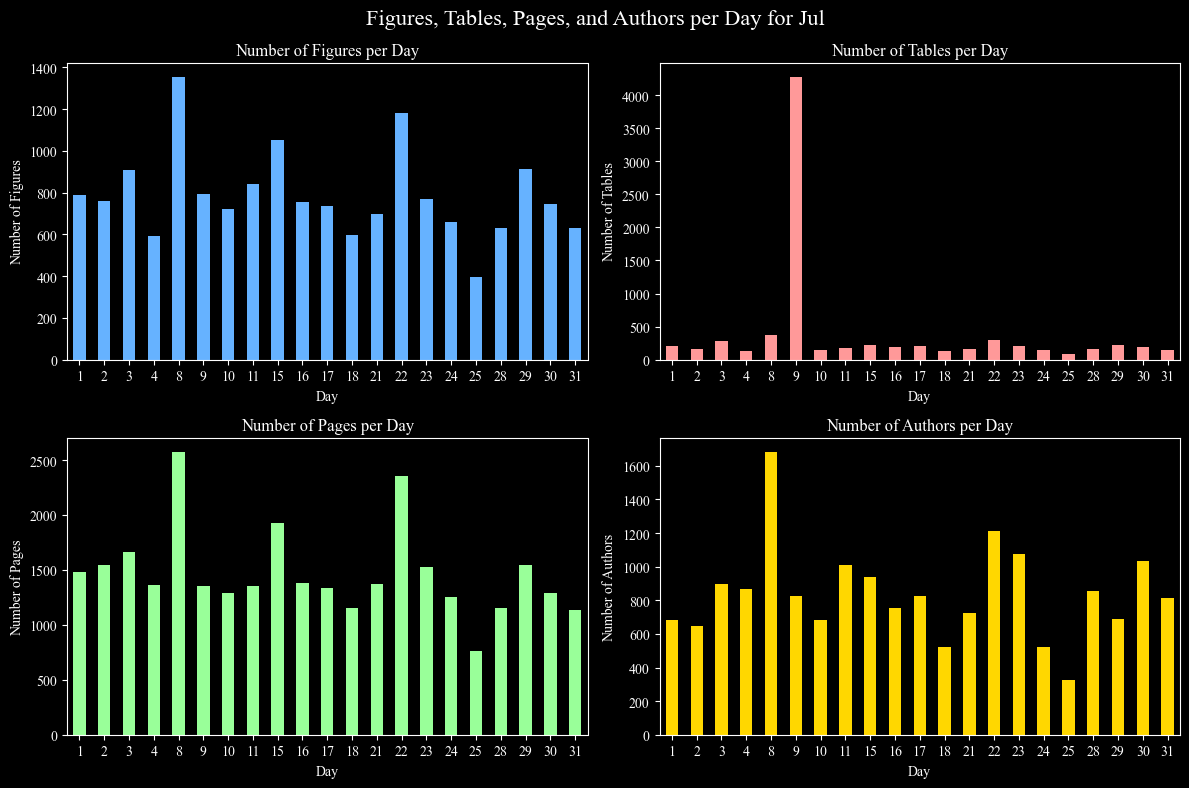

In [8]:

i = 6 # Month Number
masked_data = data[data['month'] == list_unique_months[i]]

figures_per_day = masked_data.groupby('day')['figures'].sum()
tables_per_day = masked_data.groupby('day')['tables'].sum()
pages_per_day = masked_data.groupby('day')['pages'].sum()
authors_per_day = masked_data.groupby('day')['authors'].apply(lambda x: x.str.split(', ').str.len().sum())

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

figures_per_day.plot(kind='bar', ax=ax[0, 0], color='#66B2FF')
ax[0, 0].set_xlabel('Day')
ax[0, 0].set_ylabel('Number of Figures')
ax[0, 0].set_title('Number of Figures per Day')
ax[0, 0].set_xticks(range(len(figures_per_day)))
ax[0, 0].set_xticklabels(figures_per_day.index, rotation=0)

tables_per_day.plot(kind='bar', ax=ax[0, 1], color='#FF9999')
ax[0, 1].set_xlabel('Day')
ax[0, 1].set_ylabel('Number of Tables')
ax[0, 1].set_title('Number of Tables per Day')
ax[0, 1].set_xticks(range(len(tables_per_day)))
ax[0, 1].set_xticklabels(tables_per_day.index, rotation=0)

pages_per_day.plot(kind='bar', ax=ax[1, 0], color='#99FF99')
ax[1, 0].set_xlabel('Day')
ax[1, 0].set_ylabel('Number of Pages')
ax[1, 0].set_title('Number of Pages per Day')
ax[1, 0].set_xticks(range(len(pages_per_day)))
ax[1, 0].set_xticklabels(pages_per_day.index, rotation=0)

authors_per_day.plot(kind='bar', ax=ax[1, 1], color='#FFD700')
ax[1, 1].set_xlabel('Day')
ax[1, 1].set_ylabel('Number of Authors')
ax[1, 1].set_title('Number of Authors per Day')
ax[1, 1].set_xticks(range(len(authors_per_day)))
ax[1, 1].set_xticklabels(authors_per_day.index, rotation=0)

plt.suptitle(f'Figures, Tables, Pages, and Authors per Day for {list_unique_months[i]}', fontsize=16)
plt.tight_layout()
plt.show()


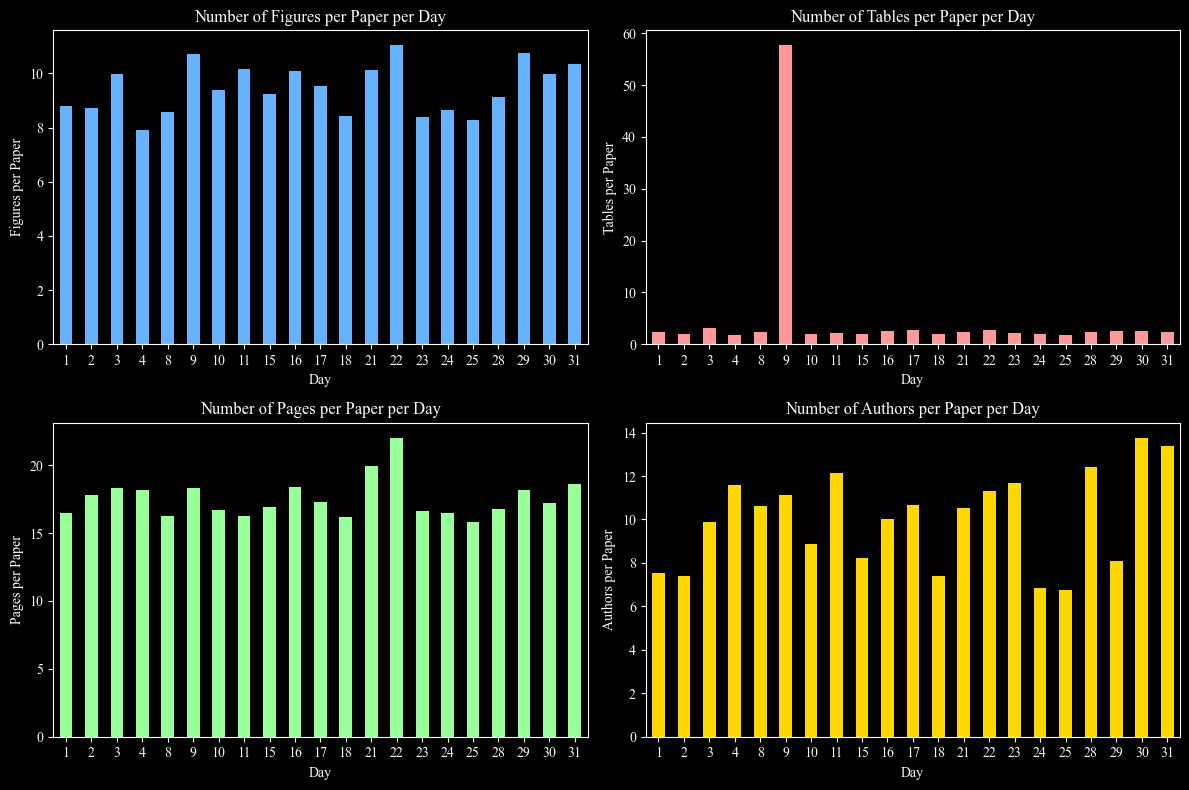

In [9]:
masked_data = data[data['month'] == list_unique_months[i]]

papers_per_day = masked_data.groupby('day').size()

figures_per_paper = figures_per_day / papers_per_day
tables_per_paper = tables_per_day / papers_per_day
pages_per_paper = pages_per_day / papers_per_day
authors_per_paper = authors_per_day / papers_per_day

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

figures_per_paper.plot(kind='bar', ax=ax[0, 0], color='#66B2FF')
ax[0, 0].set_xlabel('Day')
ax[0, 0].set_ylabel('Figures per Paper')
ax[0, 0].set_title('Number of Figures per Paper per Day')
ax[0, 0].set_xticks(range(len(figures_per_paper)))
ax[0, 0].set_xticklabels(figures_per_paper.index, rotation=0)

tables_per_paper.plot(kind='bar', ax=ax[0, 1], color='#FF9999')
ax[0, 1].set_xlabel('Day')
ax[0, 1].set_ylabel('Tables per Paper')
ax[0, 1].set_title('Number of Tables per Paper per Day')
ax[0, 1].set_xticks(range(len(tables_per_paper)))
ax[0, 1].set_xticklabels(tables_per_paper.index, rotation=0)

pages_per_paper.plot(kind='bar', ax=ax[1, 0], color='#99FF99')
ax[1, 0].set_xlabel('Day')
ax[1, 0].set_ylabel('Pages per Paper')
ax[1, 0].set_title('Number of Pages per Paper per Day')
ax[1, 0].set_xticks(range(len(pages_per_paper)))
ax[1, 0].set_xticklabels(pages_per_paper.index, rotation=0)

authors_per_paper.plot(kind='bar', ax=ax[1, 1], color='#FFD700')
ax[1, 1].set_xlabel('Day')
ax[1, 1].set_ylabel('Authors per Paper')
ax[1, 1].set_title('Number of Authors per Paper per Day')
ax[1, 1].set_xticks(range(len(authors_per_paper)))
ax[1, 1].set_xticklabels(authors_per_paper.index, rotation=0)

plt.tight_layout()
plt.show()


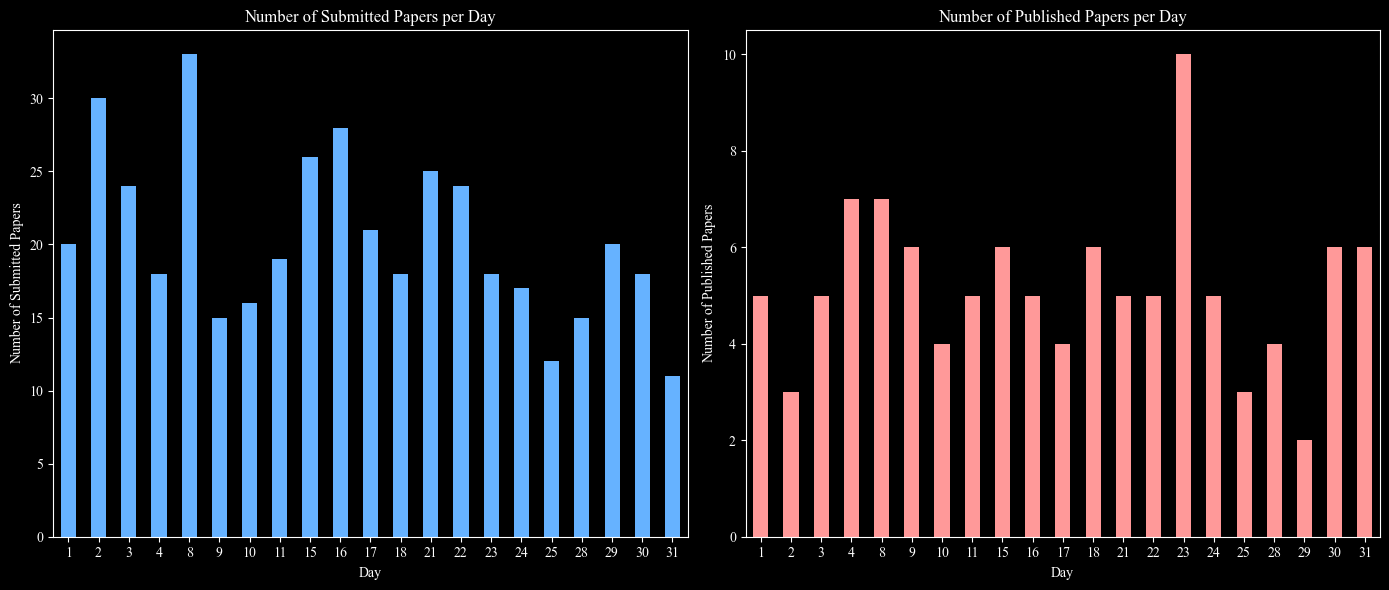

In [10]:
masked_data = data[data['month'] == list_unique_months[i]]
submitted_papers_per_day = masked_data.groupby('day')['submitted_journal'].count()
published_papers_per_day = masked_data.groupby('day')['published_journal'].count()

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

submitted_papers_per_day.plot(kind='bar', ax=ax[0], color='#66B2FF')
ax[0].set_xlabel('Day')
ax[0].set_ylabel('Number of Submitted Papers')
ax[0].set_title('Number of Submitted Papers per Day')
ax[0].set_xticks(range(len(submitted_papers_per_day)))
ax[0].set_xticklabels(submitted_papers_per_day.index, rotation=0)

published_papers_per_day.plot(kind='bar', ax=ax[1], color='#FF9999')
ax[1].set_xlabel('Day')
ax[1].set_ylabel('Number of Published Papers')
ax[1].set_title('Number of Published Papers per Day')
ax[1].set_xticks(range(len(published_papers_per_day)))
ax[1].set_xticklabels(published_papers_per_day.index, rotation=0)

plt.tight_layout()
plt.show()

In [11]:
keywords = data['keywords'].tolist()

# Flatten the list of keywords and count occurrences, handling different formats
all_keywords = []
for keyword_str in keywords:
    try:
        # Try to handle string representations of lists
        if isinstance(keyword_str, str):
            # Remove brackets and quotes
            keyword_str = keyword_str.strip('[]').replace("'", "")
            # Split by comma and clean up
            keywords_list = [k.strip() for k in keyword_str.split(',') if k.strip()]
            all_keywords.extend(keywords_list)
    except:
        continue

keyword_counts = Counter(all_keywords)

# Find the most common keyword
most_common_keyword, count = keyword_counts.most_common(1)[0]
print(f"The most repeated keyword is {most_common_keyword} and it was repeated {count} times.")

# Second most common keyword
second_most_common_keyword, count = keyword_counts.most_common(2)[1]
print(f"The second most repeated keyword is {second_most_common_keyword} and it was repeated {count} times.")


The most repeated keyword is accretion and it was repeated 189 times.
The second most repeated keyword is reionization and it was repeated 96 times.


In [12]:
# Find the author papers
author = 'Jose'
papers = data[data['authors'].str.contains(author)]
papers


,title,abstract,authors,figures,pages,tables,pdf_link,primary_subject,secondary_subjects,submitted_journal,published_journal,keywords,date,day,month
20,A Novel Survey for Young Substellar Objects wi...,We present a study of very low-mass stars and ...,"['Tanvi Sharma', 'Wen-Ping Chen', 'Beth Biller...",35.0,25.0,4.0,arxiv.org/pdf/2501.00433,Solar and Stellar Astrophysics,['Astrophysics of Galaxies'],The Astrophysical Journal,NaN,[],2025-01-03,3,Jan
58,A Near-IR Search for Helium in the Superlumino...,"We present a detailed study of SN 2024ahr, a h...","['Harsh Kumar', 'Edo Berger', 'Peter K. Blanch...",7.0,20.0,2.0,arxiv.org/pdf/2501.01485,High Energy Astrophysical Phenomena,"['Astrophysics of Galaxies', 'Solar and Stella...",NaN,NaN,['Supernovae() — Optical astronomy() — Transie...,2025-01-06,6,Jan
67,An Integral Field Unit for the Binospec Spectr...,Binospec is a wide-field optical (360 to 1000 ...,"['Daniel Fabricant', 'Sagi Ben-Ami', 'Igor Chi...",11.0,12.0,1.0,arxiv.org/pdf/2501.01528,Instrumentation and Methods for Astrophysics,NaN,PASP,NaN,"['Spectroscopy — Astronomical Optics 1', 'are ...",2025-01-06,6,Jan
96,Sporadic Dips from Extended Debris Transiting ...,We present the discovery of deep but sporadic ...,"['J. J. Hermes', 'Joseph A. Guidry', 'Zachary ...",5.0,13.0,5.0,arxiv.org/pdf/2501.02050,Solar and Stellar Astrophysics,['Earth and Planetary Astrophysics'],NaN,NaN,['White dwarf stars (1799) — Transits (1711) —...,2025-01-07,7,Jan
104,Effects of Galaxy Cluster Structure on Lensed ...,Strong gravitational lenses come in many forms...,"['Luka Vujeva', 'Jose María Ezquiaga', 'Rico K...",10.0,13.0,0.0,arxiv.org/pdf/2501.02096,Cosmology and Nongalactic Astrophysics,['General Relativity and Quantum Cosmology'],NaN,NaN,[],2025-01-07,7,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16215,SN 2023taz: Implications for the UV Diversity ...,Superluminous supernovae (SLSNe) are some of t...,"['Aysha Aamer', 'Matt Nicholl', 'Charlotte Ang...",9.0,19.0,2.0,arxiv.org/pdf/2511.14916,High Energy Astrophysical Phenomena,NaN,ApJ,NaN,['Supernovae (1668) – Core-collapse supernovae...,2025-11-20,20,Nov
16242,Galaxy-Multiplet Clustering from DESI DR2,We present an efficient estimator for higher-o...,"['Hanyue Wang', 'Daniel J. Eisenstein', 'Jessi...",9.0,12.0,0.0,arxiv.org/pdf/2511.15354,Cosmology and Nongalactic Astrophysics,NaN,MNRAS,NaN,['cosmology: large-scale structure of Universe...,2025-11-20,20,Nov
16277,Decoding the Radio Sky: Bayesian Ensemble Lear...,The classification of radio galaxies is centra...,"['Theophilus Ansah-Narh', 'Jordan Lontsi Tedon...",10.0,30.0,2.0,arxiv.org/pdf/2511.15788,Instrumentation and Methods for Astrophysics,['Astrophysics of Galaxies'],NaN,"Astronomy and Computing (Volume 54, January 20...","['Singular Value Decomposition', 'Radio Galaxy...",2025-11-21,21,Nov
16419,Moving superfluids in the rotating universe,We study homogeneous cosmological models featu...,"['Jose Beltrán Jiménez', 'Federico Piazza', 'J...",3.0,20.0,0.0,arxiv.org/pdf/2511.17472,Cosmology and Nongalactic Astrophysics,['General Relativity and Quantum Cosmology'],NaN,NaN,[],2025-11-24,24,Nov
